In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Chemins vers les fichiers sur Google Drive
base_path = '/content/drive/MyDrive/Donnees/'

def load_data(file_name):
    return pd.read_csv(base_path + file_name)

# Chargement des données
election = load_data("Election_Securite.csv")
emploi = load_data("Emploi.csv")
education = load_data("Education.csv")
sante = load_data("Sante.csv")
pouvoir_achat = load_data("Pouvoir_Achat.csv")

# Préparation des données d'élection
election = election.loc[:, ['% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot',
                            'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot', "Nom", "code"]]
election.rename(columns={'code': 'code departement'}, inplace=True)
election['code departement'] = election['code departement'].astype(str)

# Fusion des bases de données
def merge_data(dfs, on='code departement'):
    from functools import reduce
    return reduce(lambda left, right: pd.merge(left, right, on=on), dfs)

database = merge_data([election, education, sante])
database.dropna(inplace=True)

# Séparation des données en caractéristiques (X) et cible (y)
y = database.pop("Nom")
X = database


In [ ]:
# Fusion des bases de données
def merge_data(dfs, on='code departement'):
    from functools import reduce
    merged_data = reduce(lambda left, right: pd.merge(left, right, on=on), dfs)
    print("Nombre de lignes et de colonnes après fusion des données :", merged_data.shape)
    return merged_data

database = merge_data([election, education, sante])


Nombre de lignes et de colonnes après fusion des données : (5797932, 22)


In [ ]:
# Fusion des bases de données
def merge_data(dfs, on='code departement'):
    from functools import reduce
    merged_data = reduce(lambda left, right: pd.merge(left, right, on=on), dfs)
    print("Nombre de lignes et de colonnes après fusion des données :", merged_data.shape)
    print("Premières lignes du DataFrame fusionné :\n", merged_data.head())  # Affiche les premières lignes
    return merged_data

database = merge_data([election, education, sante])


Nombre de lignes et de colonnes après fusion des données : (5797932, 22)
Premières lignes du DataFrame fusionné :
    % Abs/Ins  Votants  % Vot/Ins  Blancs  % Blancs/Ins  % Blancs/Vot  Nuls  \
0      10.34     1058      89.66      17          1.44          1.61     6   
1      10.34     1058      89.66      17          1.44          1.61     6   
2      10.34     1058      89.66      17          1.44          1.61     6   
3      10.34     1058      89.66      17          1.44          1.61     6   
4      10.34     1058      89.66      17          1.44          1.61     6   

   % Nuls/Ins  % Nuls/Vot  Exprimés  ...      Nom  code departement EC_MAT  \
0        0.51        0.57      1035  ...  ARTHAUD                41      5   
1        0.51        0.57      1035  ...  ARTHAUD                41      5   
2        0.51        0.57      1035  ...  ARTHAUD                41      5   
3        0.51        0.57      1035  ...  ARTHAUD                41      5   
4        0.51        0.57 

In [ ]:
# Sauvegarde du DataFrame fusionné en CSV
database.to_csv('/content/database_fusion.csv', index=False)

# Téléchargement du fichier CSV
from google.colab import files
files.download('/content/database_fusion.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encodage de la cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalisation des données
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Modèle de Régression Logistique
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Évaluation du modèle
print("Accuracy Logistic Regression: {:.2f}%".format(accuracy_score(y_test, y_pred_logreg) * 100))
print(classification_report(y_test, y_pred_logreg))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression: 90.37%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92    125815
           1       0.92      0.96      0.94    372029
           2       0.94      0.97      0.96    267402
           3       0.91      0.61      0.73     41762
           4       0.95      0.96      0.96     21328
           5       0.81      0.69      0.75     61466
           6       1.00      0.99      0.99     27263
           7       0.00      0.00      0.00      4775
           8       0.83      0.88      0.86     70245
           9       0.83      0.86      0.84    160536
          10       0.00      0.00      0.00      6966

    accuracy                           0.90   1159587
   macro avg       0.74      0.71      0.72   1159587
weighted avg       0.89      0.90      0.90   1159587



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Évaluation du modèle
print("Accuracy Random Forest: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print(classification_report(y_test, y_pred_rf))


Accuracy Random Forest: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    125815
           1       1.00      1.00      1.00    372029
           2       1.00      1.00      1.00    267402
           3       1.00      1.00      1.00     41762
           4       1.00      1.00      1.00     21328
           5       1.00      1.00      1.00     61466
           6       1.00      1.00      1.00     27263
           7       1.00      1.00      1.00      4775
           8       1.00      1.00      1.00     70245
           9       1.00      1.00      1.00    160536
          10       1.00      1.00      1.00      6966

    accuracy                           1.00   1159587
   macro avg       1.00      1.00      1.00   1159587
weighted avg       1.00      1.00      1.00   1159587



Epoch 1/20
36238/36238 [==============================] - 135s 4ms/step - loss: 0.0403 - accuracy: 0.9889 - val_loss: 3.0216e-04 - val_accuracy: 0.9999
Epoch 2/20
36238/36238 [==============================] - 124s 3ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 2.2537e-04 - val_accuracy: 1.0000
Epoch 3/20
36238/36238 [==============================] - 124s 3ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 1.3841e-04 - val_accuracy: 1.0000
Epoch 4/20
36238/36238 [==============================] - 132s 4ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 1.0498e-04 - val_accuracy: 0.9999
Epoch 5/20
36238/36238 [==============================] - 132s 4ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 8.8339e-06 - val_accuracy: 1.0000
Epoch 6/20
36238/36238 [==============================] - 126s 3ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 6.3917e-06 - val_accuracy: 1.0000
Epoch 7/20
36238/36238 [==============================] - 134s 4ms/step - loss: 0.0044 -

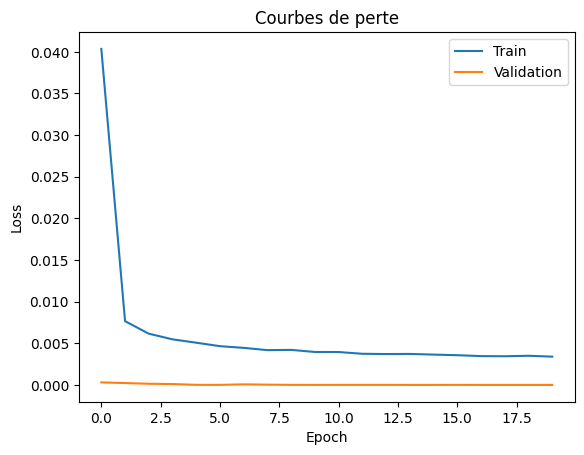

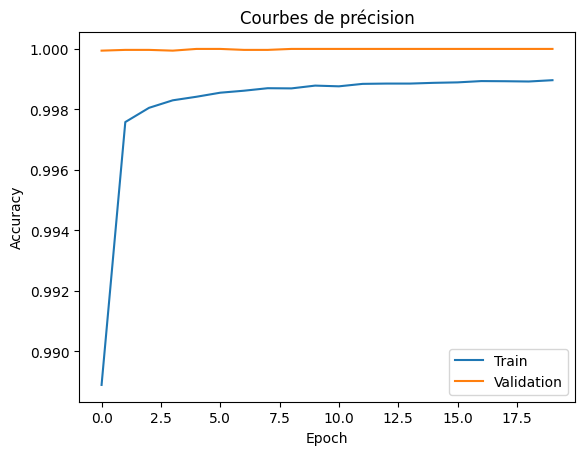

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Conversion des étiquettes en vecteurs binaires catégoriques
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Création du modèle MLP
model = Sequential()
model.add(Dense(100, activation='tanh', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dense(len(np.unique(y_encoded)), activation='softmax'))

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=128, validation_data=(X_test, y_test_categorical))

# Évaluation du modèle
loss, accuracy_mlp = model.evaluate(X_test, y_test_categorical)
print("Accuracy MLP: {:.2f}%".format(accuracy_mlp * 100))

# Visualisation des courbes de perte et de précision
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbes de perte')
plt.show()

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbes de précision')
plt.show()
